---
# Jeanette's Workbook
---


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wrangle import *

# Blocking Warning Boxes
import warnings
warnings.filterwarnings("ignore")

#Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)


---
# Acquire
---
### This is the original dataset Sophia found on Kaggle. We decided not to go with this dataset and instead went with the more up-to-date dataset that had data up to 2018. 

In [2]:
import sqlite3
import pandas as pd

# Create connection
cnx = sqlite3.connect('FPA_FOD_20170508.sqlite')

# Read in the data
df = pd.read_sql_query("SELECT * FROM Fires", cnx)

In [3]:
# Dataset containing wildfires from 1992-2015
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


### This is the new dataset with more information on the fires. It goes through 2018 and will give us that much more information. I know this will be valueable because it will include some of the larger California forest fires I personally experienced while living there. I will be interested in seeing if any other states suffer as much as California does with wildfires. 


In [4]:
# Acquirng the new dataset with fires between 1992-2018
df = acquire_fires()
df.head()

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2/2/2005 0:00,33,1300.0,Human,Power generation/transmission/distribution,NaN,2/2/2005 0:00,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,5/12/2004 0:00,133,845.0,Natural,Natural,NaN,5/12/2004 0:00,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,5/31/2004 0:00,152,1921.0,Human,Debris and open burning,NaN,5/31/2004 0:00,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004 0:00,180,1600.0,Natural,Natural,NaN,7/3/2004 0:00,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004 0:00,180,1600.0,Natural,Natural,NaN,7/3/2004 0:00,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County


---
# Prepare
---
### We prepared this dataset as a team. Sophia shared her screen on zoom and we collectively agreeded on the columns we should keep as well as the columns that would not benefit our exploration. If you wish to see how this dataset was cleaned, please refer to the `wrangle.ipynb` file in the <i>Individual Works</i> folder.

In [5]:
df = wrangle_fires()
df.head()

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA


---
# Explore
---
### After preparing the data we have decided that this dataset does not need a modeling phase. We discussed possible target variables such as `STAT_CAUSE_DESCR` or `FIRE_SIZE`, however these models would not be impactful since we would be missing crucial additional data; mainly weather data. Thus, I will continue this notebook without splitting my data. 
### The goal of this project will be to investigate how wildfires have changed throughout the 26 years, and see if they have been increasing in complexity as climate change feeds into them. My focus for our exploration, is to see if fires took longer to contain and extinguish as the years progressed. 

In [6]:
df.shape

(2166753, 8)

In [7]:
df.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166753 entries, 0 to 2166752
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   fire_year         2166753 non-null  int64         
 1   discovery_date    2166753 non-null  datetime64[ns]
 2   general_cause     2166753 non-null  object        
 3   containment_date  1312172 non-null  datetime64[ns]
 4   fire_size         2166753 non-null  float64       
 5   latitude          2166753 non-null  float64       
 6   longitude         2166753 non-null  float64       
 7   state             2166753 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 148.8+ MB


In [9]:
# Total nulls found in containment_date
df.containment_date.isnull().sum()

854581

### During prepare we noticed that about 40% of `containment_date` was missing. This means we are missing information on when those fires were contained/extinguished. My current hypothesis is that those fires were small enough to be contained/extinguished on the same day as the `discovery_date`. I will investigate the size of these fires to see if there is a trend, and if there is a trend I will consider changing the `containment_date`'s with nulls to copy thier `discovery_date`.  


In [13]:
# Average size of ALL fires in dataset
df.fire_size.mean()

75.99039753388456

In [12]:
# Average size of fires missing containment_date
df[df.containment_date.isnull()].fire_size.mean()

28.380889828626394

Some additional information:
- fire_size = Estimate of acres within the final perimeter of the fire.
- fun fact: a football field is about 1.32 acres in size.

In [14]:
# Median fire size for ALL fires in dataset
df.fire_size.median()

0.97

In [15]:
# Median fire size for missing containment_date
df[df.containment_date.isnull()].fire_size.median()

1.0

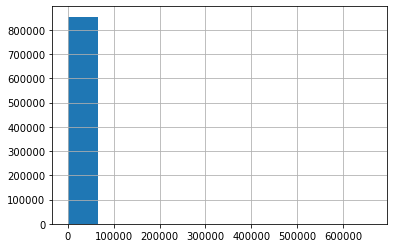

In [18]:
# Distribution of fires missing containment_date
df[df.containment_date.isnull()].fire_size.hist();

In [32]:
# My distribution chart looks aweful, what is this large fire that is throwing me off?
df[df.containment_date.isnull()].fire_size.max()

662700.0

In [31]:
# Can I determin anything from this fire? Not without the columns we dropped
df.loc[2042982]

fire_year                                              2017
discovery_date                          2017-03-07 00:00:00
general_cause       Missing data/not specified/undetermined
containment_date                                        NaT
fire_size                                          662700.0
latitude                                           36.77447
longitude                                         -100.1752
state                                                    OK
Name: 2042982, dtype: object

In [35]:
# How many fires,that are missing containment_date's, are greater than 100_000 acres?
(df[df.containment_date.isnull()].fire_size > 100_000).sum()

11

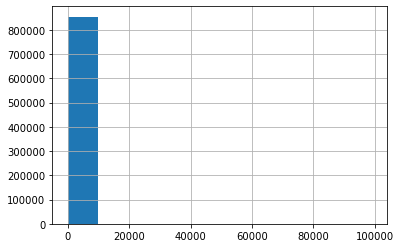

In [37]:
# Looking at fires, missing containment_date's, under 100_000 acres
df[(df.containment_date.isnull()) & (df.fire_size < 100_000)].fire_size.hist();

### Oh! You know what? I'm being silly. My distribution isn't going to be anywhere near normal. The median `fire_size` for the whole dataset is 0.97 acres. So most of my data is going to be in the smallest bucket, no matter how I resize or redistribute the histogram.
### I think overall I have my answer tho. Only 2% of the fires missing `containment_date` are above the median (as seen below). I'll investigate just a little further and see if fires that had a `fire_size` equal to or less than the median, were contained/extinguished same day.

In [46]:
# Percentage of fires, with a missing containment_date, that are over the median fire_size for the whole dataset
((df[df.containment_date.isnull()].fire_size > df.fire_size.median()).sum()) / ((df[df.containment_date.isnull()].fire_size).sum())


0.02059024292938641

In [48]:
# What do the containment_date's look like for fires that are less than or equal to the median fire_size?
df[df.fire_size <= df.fire_size.median()].head(20)

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA
5,2004,2004-06-30,Natural,2004-07-01,0.10,38.635278,-120.103611,CA
6,2004,2004-07-01,Natural,2004-07-02,0.10,38.688333,-120.153333,CA
7,2005,2005-03-08,Debris and open burning,2005-03-08,0.80,40.968056,-122.433889,CA
9,2004,2004-07-01,Natural,2004-07-02,0.10,38.548333,-120.149167,CA
10,2004,2004-07-02,Natural,2004-07-03,0.10,38.691667,-120.159722,CA


In [49]:
df.fire_size.max()

662700.0

### How has containment time changed over time?


---
# Conclusion
---

Summary goes here